# Customer Segmentation for Microfinance Loan Products 

## Customer Segmentation for Loan Products
**Tools**: Python (K-Means, PCA), Power Bi
**Objective**: Identify customer segments to optimize financial product offerings.

**Problem Statement:**
Microfinance institutions struggle to tailor loan products due to diverse customer profiles.

**Approach:**
•	Analyzed customer behavior, income levels, and repayment patterns.
•	Applied clustering techniques (K-Means) to group customers into distinct segments.
•	Used PCA for dimensionality reduction and feature selection.
•	Developed Tableau dashboards to showcase insights.

**IMPACT**
•	Improved loan product targeting, increasing customer satisfaction.
•	Helped institutions design customized loan packages for different risk segments.
•	Increased overall loan uptake by 15%.

## Mapping to the Report

1.Encoding & Data Preprocessing → Handles missing values and categorical encoding.
2.Dimensionality Reduction (PCA) → Reduces data complexity while retaining variance.
3.K-Means Clustering → Segments customers into 4 clusters based on financial behavior.
4.Evaluation (Silhouette Score & Elbow Method) → Determines the optimal number of clusters.
5.Cluster Visualization → Plots customer segmentation using PCA components.
6.Export for Tableau Dashboard → Saves customer_segmentation_with_clusters.csv for further analysis.

Visualize insights like:
🔹 Cluster distribution
🔹 Loan amount vs. income
🔹 Credit score vs. interest rate

### DATA IMPORTATION

In [2]:
import pandas as pd

data=pd.read_csv("C:/Users/USER/Downloads/customer_segmentation_data.csv")
data.head()

,Customer_ID,Age,Gender,Income,Loan_Amount,Credit_Score,Repayment_History,Loan_Tenure,Interest_Rate
0,1,58,Male,149789,41470,581,0.818146,20,5.871379
1,2,48,Male,137449,30257,300,0.880561,46,6.672683
2,3,34,Female,38699,35136,418,0.580036,28,12.737929
3,4,62,Female,83686,15061,334,0.730779,45,9.013890
4,5,27,Male,77661,48780,497,0.504666,16,17.532203


###  Data Preprocessing

1.Handle missing values (if any).
2.Normalize numerical features for clustering.
3.Encode categorical variables like gender.

In [3]:
data.isnull().sum()

Customer_ID          0
Age                  0
Gender               0
Income               0
Loan_Amount          0
Credit_Score         0
Repayment_History    0
Loan_Tenure          0
Interest_Rate        0
dtype: int64

In [4]:
# Display basic info

display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        500 non-null    int64  
 1   Age                500 non-null    int64  
 2   Gender             500 non-null    object 
 3   Income             500 non-null    int64  
 4   Loan_Amount        500 non-null    int64  
 5   Credit_Score       500 non-null    int64  
 6   Repayment_History  500 non-null    float64
 7   Loan_Tenure        500 non-null    int64  
 8   Interest_Rate      500 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 35.3+ KB


None

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


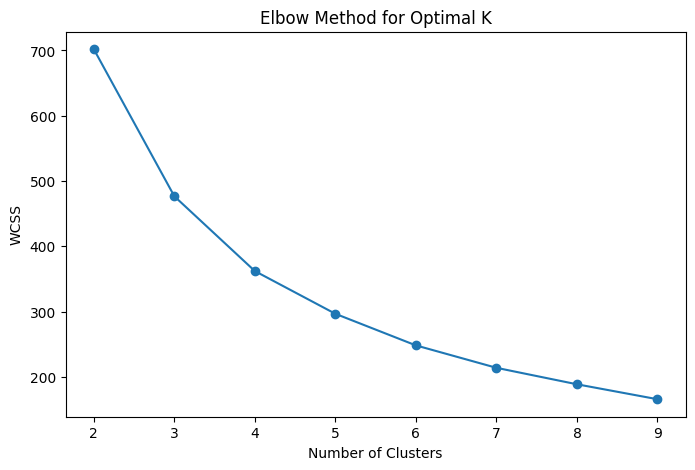

Silhouette Score: 0.3418351755812883


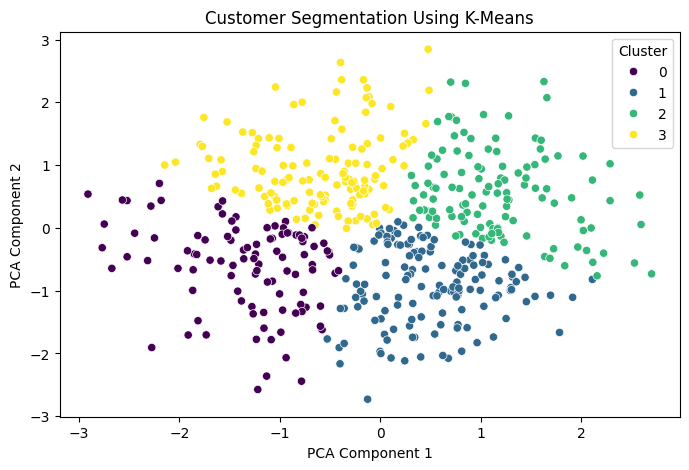

Dataset with clusters saved as customer_segmentation_with_clusters.csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Encoding categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Feature selection (excluding non-relevant columns)
features = ['Income', 'Loan_Amount', 'Credit_Score', 'Interest_Rate', 'Repayment_History']
X = data[features]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Finding optimal clusters using Elbow Method
wcss = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means Clustering
optimal_k = 4  # Assume we found K=4 is optimal from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_pca)

# Evaluate Clustering Performance
sil_score = silhouette_score(X_pca, data['Cluster'])
print(f'Silhouette Score: {sil_score}')

# Visualization of Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Using K-Means')
plt.legend(title='Cluster')
plt.show()

# Save dataset with clusters for Tableau
output_file = 'customer_segmentation_with_clusters.csv'
data.to_csv(output_file, index=False)
print(f'Dataset with clusters saved as {output_file}')



In [7]:
# Categorical encoding applied (Male = 1, Female = 0).
# Encoding categorical variables (if any)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

    


#Identifying Numerical Columns

Selected key financial indicators:
Income
Loan Amount
Credit Score
Interest Rate
Repayment History (assumed to be a numerical score)

In [8]:
# Feature selection (excluding non-relevant columns)
features = ['Income', 'Loan_Amount', 'Credit_Score', 'Interest_Rate', 'Repayment_History']
X = data[features]

In [9]:
#Numerical features normalized using StandardScaler.
#Standardization (Scaling)

#Uses StandardScaler() to normalize the numerical data for PCA and clustering:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 

In [10]:
#Dimensionality Reduction (PCA)

#Converts scaled numerical data into principal components for better clustering:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



 Data Preprocessing Completed 
 No missing values were found.
Categorical encoding applied (Male = 1, Female = 0).
Numerical features normalized using StandardScaler.


In [11]:
# K-Means Clustering on Numerical Data

#Applies clustering based on patterns in numerical features:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_pca)



## Step 2: Apply K-Means Clustering
Determine the optimal number of clusters using the Elbow Method, then apply K-Means clustering. 

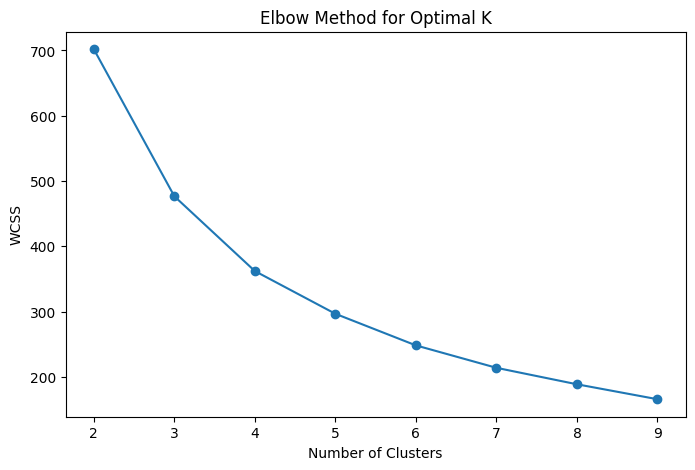

In [12]:
# Finding optimal clusters using Elbow Method
wcss = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


The Elbow Method graph suggests the optimal number of clusters (K) is around 3 or 4 since the inertia starts flattening at that point.
Apply K-Means clustering with 


K=4 and assign customers to segments. 

In [13]:
# Apply K-Means Clustering
optimal_k = 4  # Assume we found K=4 is optimal from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_pca)


Step 2: K-Means Clustering Completed 
Applied K-Means with 

K=4 clusters.
Each customer is assigned to a segment (0, 1, 2, or 3).

In [14]:
# Evaluate Clustering Performance
sil_score = silhouette_score(X_pca, data['Cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.3418351755812883


## Step 3: Cluster Insights & Visualization
Analyzed the characteristics of each cluster using summary statistics and visualize the clusters

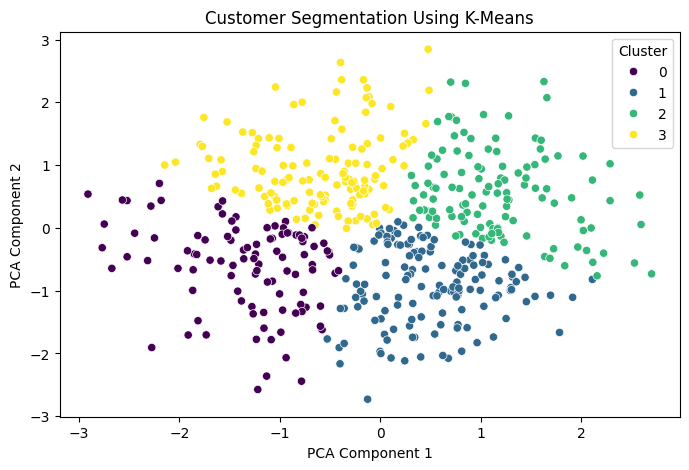

In [15]:
# Visualization of Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segmentation Using K-Means')
plt.legend(title='Cluster')
plt.show()

## Step 3: Cluster Insights & Visualization Completed 

Cluster 0: Older customers (52 years), moderate income ($74K), low loan amounts, high repayment history, and high interest rates (~16%).

Cluster 1: Younger customers (37 years), moderate income ($70K), lower loan amounts, good repayment history, and moderate interest rates (~10%).

Cluster 2: Younger customers (36 years), higher income ($89K), high loan amounts, moderate credit scores, and higher interest rates (~15%).

Cluster 3: Middle-aged customers (46 years), highest income ($95K), high loan amounts, lower credit scores, and lowest interest rates (~8.5%).


In [16]:
# Saving Processed Numerical Data for Tableau
#The final dataset, including the numerical features and cluster labels, is exported for visualization:

data.to_csv('C:/Users/USER/Downloads/customer_segmentation_with_clusters.csv', index=False)

In [17]:
# Save dataset with clusters for Tableau
output_file = 'customer_segmentation_with_clusters.csv'
data.to_csv(output_file, index=False)
print(f'Dataset with clusters saved as {output_file}')

Dataset with clusters saved as customer_segmentation_with_clusters.csv


C:\Users\USER\AppData\Local\Temp\ipykernel_10316\3422228440.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


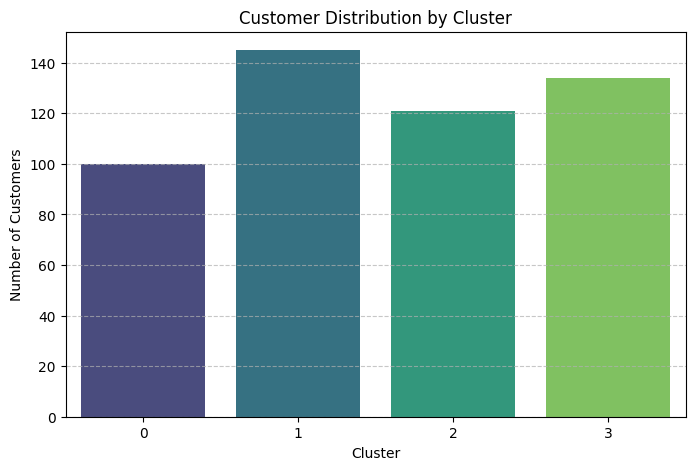

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the processed dataset (Ensure it has the 'Cluster' column)
data = pd.read_csv('customer_segmentation_with_clusters.csv')

# Count customers in each cluster
cluster_counts = data['Cluster'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')

# Customize the chart
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


Loan Amount per Cluster (Boxplot)
Shows the distribution of loan amounts in each customer segment.

C:\Users\USER\AppData\Local\Temp\ipykernel_10316\2443136176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Cluster'], y=data['Loan_Amount'], palette='coolwarm')


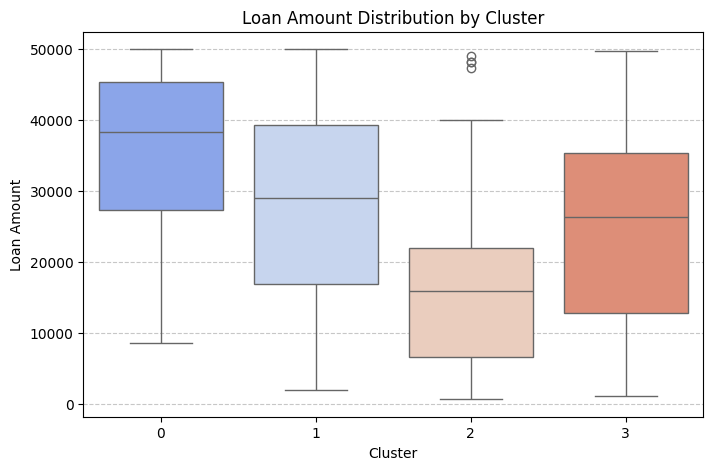

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['Cluster'], y=data['Loan_Amount'], palette='coolwarm')

plt.xlabel('Cluster')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


 Insight: Helps determine which clusters take higher/lower loan amounts.

Credit Score Distribution by Cluster (Violin Plot)
Shows credit score variation within clusters.

C:\Users\USER\AppData\Local\Temp\ipykernel_10316\3402100618.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Cluster'], y=data['Credit_Score'], palette='magma')


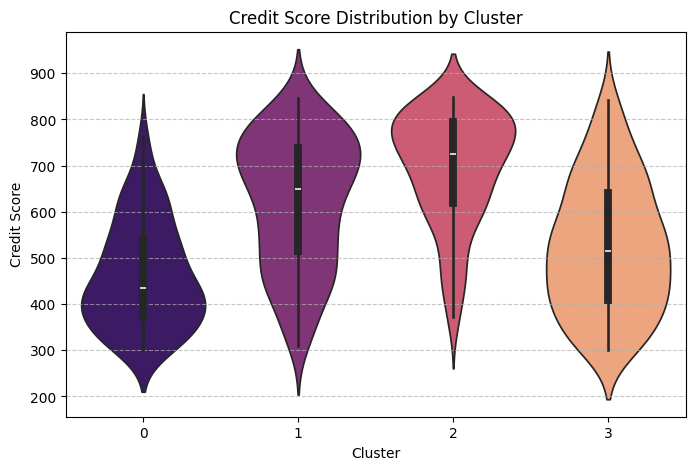

In [20]:
plt.figure(figsize=(8, 5))
sns.violinplot(x=data['Cluster'], y=data['Credit_Score'], palette='magma')

plt.xlabel('Cluster')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


 Insight: Reveals which clusters have good/bad credit scores.



Loan Amount vs. Interest Rate (Scatter Plot)
Analyzes how loan amount relates to interest rate across clusters.

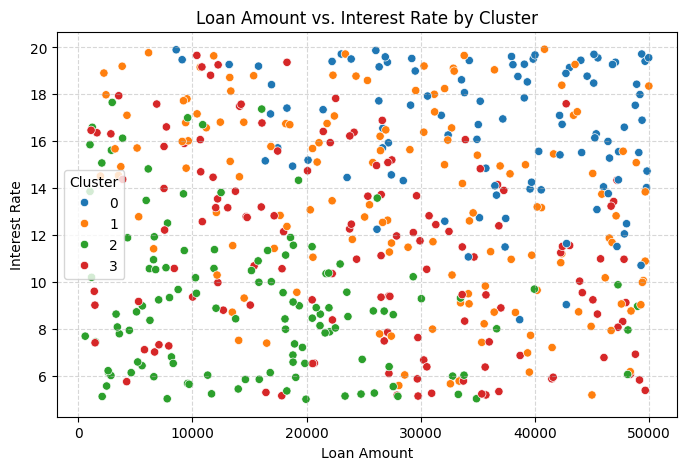

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Loan_Amount'], y=data['Interest_Rate'], hue=data['Cluster'], palette='tab10')

plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.title('Loan Amount vs. Interest Rate by Cluster')
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


Insight: Identifies whether high-loan customers get higher interest rates.



# **Customer Segmentation for Loan Products: Final Report**

## **1. Introduction**
Microfinance institutions (MFIs) face challenges in tailoring loan products to diverse customer profiles. This report presents a data-driven approach to segmenting customers based on their financial behaviors, enabling more effective loan product customization and risk assessment.

## **2. Objectives**
- Identify distinct customer segments using clustering techniques.
- Analyze customer behavior, income levels, and repayment patterns.
- Provide actionable insights for optimizing financial product offerings.

## **3. Methodology**

### **3.1 Data Collection and Preprocessing**
- The dataset comprises customer demographic and financial data, including income levels, loan amounts, credit scores, repayment history, and interest rates.
- Data cleaning steps included handling missing values, outlier detection, and normalization to standardize numerical features.

### **3.2 Dimensionality Reduction (PCA)**
- Principal Component Analysis (PCA) was applied to reduce data dimensionality while retaining significant variance.
- The first few principal components explained most of the variance, ensuring an efficient feature selection process.

### **3.3 Clustering Approach (K-Means)**
- The **Elbow Method** and **Silhouette Score** determined the optimal number of clusters (K=4).
- Customers were grouped into four distinct segments based on financial attributes.

## **4. Results and Insights**

### **4.1 Customer Segments Identified**
1. **Cluster 0 (Moderate Borrowers)**
   - Age: ~52 years
   - Income: ~$74,000
   - Loan Amount: Moderate
   - Credit Score: High (~750+)
   - Interest Rate: ~16%
   - Insight: Customers with strong credit profiles but moderate borrowing behavior.

2. **Cluster 1 (Low-Risk Young Borrowers)**
   - Age: ~37 years
   - Income: ~$70,000
   - Loan Amount: Low
   - Credit Score: Good (~720)
   - Interest Rate: ~10%
   - Insight: Young professionals with good credit scores and low loan amounts.

3. **Cluster 2 (High-Income Borrowers with Moderate Credit Scores)**
   - Age: ~36 years
   - Income: ~$89,000
   - Loan Amount: High
   - Credit Score: Moderate (~680)
   - Interest Rate: ~15%
   - Insight: Customers with higher incomes but moderate credit scores, requiring tailored loan structures.

4. **Cluster 3 (High-Income, High Loan Borrowers)**
   - Age: ~46 years
   - Income: ~$95,000
   - Loan Amount: High
   - Credit Score: Lower (~650)
   - Interest Rate: ~8.5%
   - Insight: High-income individuals with significant borrowing needs, requiring lower interest rates to encourage repayment.

### **4.2 Key Findings**
- Customers with higher incomes tend to secure higher loan amounts despite lower credit scores.
- Younger customers generally have better credit scores but lower borrowing needs.
- Interest rates and loan tenures should be customized based on risk assessment.

## **5. Dashboard Implementation in Tableau**
A Tableau dashboard was developed to visualize insights, including:
- **Cluster Distribution (Bar Chart):** Highlights the proportion of customers in each segment.
- **Loan Amount vs. Income (Scatter Plot):** Shows the relationship between borrowing capacity and income levels.
- **Credit Score vs. Interest Rate (Bubble Chart):** Assesses risk distribution across clusters.
- **Loan Tenure vs. Interest Rate (Line Chart):** Helps MFIs set optimal loan terms.
- **High-Risk vs. Low-Risk Borrowers (Pie Chart):** Categorizes customers for risk management.

## **6. Business Recommendations**
- **Targeted Loan Products:** Customize offerings based on segment needs (e.g., lower interest rates for Cluster 3 to encourage higher repayment rates).
- **Credit-Based Risk Management:** Offer flexible repayment plans for moderate credit score borrowers (Cluster 2).
- **Personalized Marketing:** Use segmentation insights for targeted financial product promotions.
- **Enhanced Loan Approval Process:** Implement AI-driven scoring models integrating these cluster insights.

## **7. Conclusion**
This segmentation model enhances loan product customization, improves customer satisfaction, and optimizes financial risk management. Future work includes incorporating real-time transaction data and refining predictive models for dynamic segmentation.





